## INTRO 
- Run a simple NN (neutal nework) model via Tensorflow DL framwork with CAT_VS_DOG KAGGLE IMAGE DATASET 

## REF 

- MODEL

- https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/3_NeuralNetworks/neural_network_raw.ipynb
- https://github.com/leemengtaiwan/cat-recognition-app/blob/master/cat_recognizer.ipynb
- https://github.com/jshin49/Kaggle-Cat-vs-Dog-Tensorflow-CNN/blob/master/utils/prepare_data.py


- LOAD DATA

- https://www.kaggle.com/luantm/dogs-and-cats-competition
- https://www.kaggle.com/andrewkh/test-time-augmentation-tta-worth-it


- INSTALL OPENCV ON MAC OSX
- https://www.pyimagesearch.com/2016/12/05/macos-install-opencv-3-and-python-3-5/



In [1]:
cd 

/Users/yennanliu


In [2]:
cd /Users/yennanliu/Kaggle.com_mini_project/Dog_VS_Cat/data

/Users/yennanliu/Kaggle.com_mini_project/Dog_VS_Cat/data


In [3]:
ls

train/ valid/


In [4]:
# OP
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd 
import os 
import cv2
import random

# DL 
import tensorflow as tf
from tensorflow.python.ops.metrics_impl import  accuracy

/Users/yennanliu/anaconda3/envs/ds_dash/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


DOG :


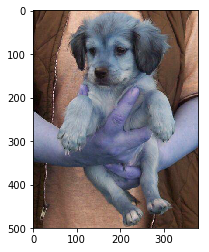

CAT :


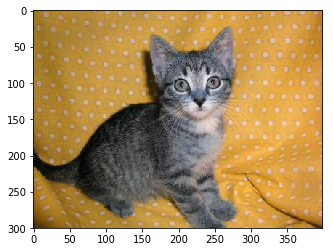

DOG :


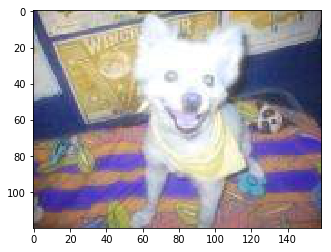

CAT :


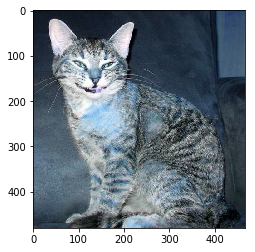

CAT :


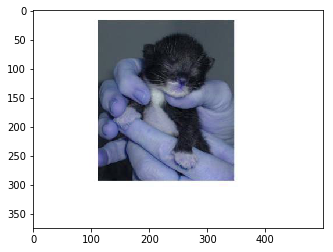

CAT :


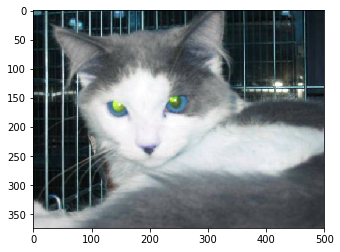

DOG :


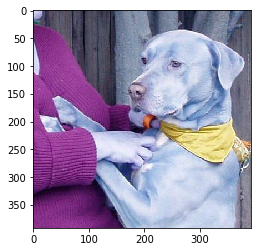

CAT :


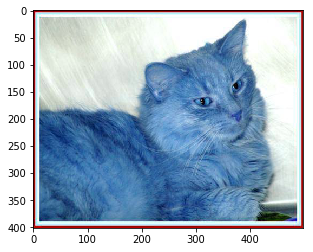

CAT :


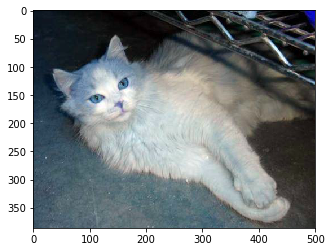

DOG :


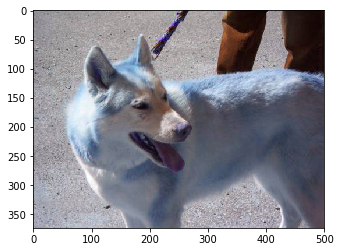

In [5]:
# Display 10 images
DATA_DIR = '/Users/yennanliu/Kaggle.com_mini_project/Dog_VS_Cat/data/train'
for file_name in os.listdir(DATA_DIR)[0:10]:
    img_array = cv2.imread(os.path.join(DATA_DIR, file_name))
    plt.imshow(img_array)
    print(file_name.split('.')[0].upper(), ':')
    plt.show()
    

In [55]:
#  HELP FUNC 

def create_data():
    x = []
    y = []
    for file_name in os.listdir(DATA_DIR):
        img_array = cv2.imread(os.path.join(DATA_DIR, file_name))
        #### MODIFY HERE FOR FOLLOWING TF PLACEHOLDER SHAPE (?, 784)    
        #new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
        new_array = cv2.resize(img_array, (1,IMG_SIZE*IMG_SIZE))
        x.append(new_array)
        if file_name.split('.')[0] == 'cat':
            y.append(0)
        else:
            y.append(1)
    return x, y


def get_next_batch(X_train,Y_train):
    idxs = np.random.permutation(X_train.shape[0]) #shuffled ordering
    X_random_batch  = X_train[idxs]
    Y_random_batch = Y_train[idxs]
    return X_random_batch,  Y_random_batch

In [56]:
# GET IMAGE PATH 

DATA_DIR = '/Users/yennanliu/Kaggle.com_mini_project/Dog_VS_Cat/data/train'
IMG_SIZE = 28

x, y = create_data()
x = np.array(x)
y = np.array(y)
print ('x, y shape : ')
print ('')
print(x.shape)
print(y.shape)

x, y shape : 

(25000, 784, 1, 3)
(25000,)


In [58]:
# PREPROCESS DATA 

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding


X_train = x / 255.0
Y_train = to_categorical(y, num_classes = 2)

In [59]:
print ('X_train , Y_train  shape : ')
print ('')
print(X_train.shape)
print(Y_train.shape)

X_train , Y_train  shape : 

(25000, 784, 1, 3)
(25000, 2)


In [62]:
# SET UP MODEL PARAMETERS 

# Parameters
learning_rate = 0.1
num_steps = 500
batch_size = 128
display_step = 100

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 2 # total classes : CAR OR DOG 

# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

In [63]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

In [64]:
# DEFINE THE MODEL
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [65]:
# BUILD THE MODEL  
logits = neural_net(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [ ]:
# RUN THE MODEL 

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, num_steps+1):
        ####################################################################################
        # modify here for CAT VS DOG DATASET                                               #
        ####################################################################################
        #batch_x, batch_y = mnist.train.next_batch(batch_size)
        batch_x, batch_y = get_next_batch(X_train, Y_train)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

    print("Optimization Finished!")

    # Calculate accuracy for MNIST test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels}))

In [67]:
# dev 